In [1]:
cat('Last updated ', date())

Last updated  Wed Oct 19 12:34:26 2022

_This is a study note while I am studyig __Generalized Linear Models and Nonparametric Regression__ offered by University of Colorado Boulder in Coursera_

# Week3. Introduction to Nonparametric Regression

## I. Nonparametric Regression Theory

### 1. Introduction to Nonparametric Regression Model

__1) Motivation__: Parametric model

A parametric statistical model is a family of probability distributions with a finite set of parameters.<br>

_Example_: The normal regression model : $\mathbf Y\sim N(X\beta, \sigma^2I_n)$

* $X\beta$: p+1 parameters (including $\beta_0$)
* $\sigma^2I_n$: 1 parameter ($\sigma$)

Overall, we need to know p+2 parameters to estimate in this model.

The Poisson and the Binomial we have studied are all parametric models. For example, a binomial reponse with a linear predictor and a logit link function.

We call that a nonparametric model is a family of probability distributions with infinitely many parameters.

__2) Motivation__: Non-Parametric model

A nonparametric statistical model is a family of probability distributions with infinitely many parameters.

_Example_:  $\mathbf Y\sim N(f(\mathbf x _1), \sigma^2I_n)$


* Suppose $f(\mathbf x _1)$ is an arbitrary function. $x_1 \in [-1,1]$ . This can be any function that has a domain from -1 to 1. Since this function is arbitrary on this interval, no finite set of parameters could spefity its form. We would need an infinite numbers of parameters to specify exactly what this funcion would be. We would need infinite data so what are trying to estimate it.

__3) Motivation__: General form

We are trying to model the mean of the response in the following way.

A relatively general form of a statistical modeling problem is

$$\mu_i = E(Y_i)=f(x_{i,1},x_{i,2}, \cdots, x_{i,p} )$$


* In Normal regression, $f(\mathbf x)=\beta_0+\beta_1x_{i,1}+\cdots+\beta_px_{i,p}$


* In Poission regression, $f(\mathbf x)=exp\{\beta_0+\beta_1x_{i,1}+\cdots+\beta_px_{i,p}\}$

Non parametric regression allows us to be more flexible with the form of f.

Rather than choose the function form beforehand, e.g:
*  $f(\mathbf x)=\beta_0+\beta_1x_{i,1}+\cdots+\beta_px_{i,p}$ (normal linear regression)
*  $f(\mathbf x)=exp\{\beta_0+\beta_1x_{i,1}+\cdots+\beta_px_{i,p}\}$ (Poission regression)

__4) Parametric vs Nonparametric Modeling__

We learn $ f$ by assuming it comes from some smooth family of functions. In this case, the set of potential fits to the data is much larger than the parametric approach.

In [136]:
r <- runif(100, -1, 1)

In [137]:
x <- runif(100, 0, 1.6)

In [138]:
# the objective function
sin_function <- function(x) {
y<-sinpi(x)
y }

In [139]:
return_y <-c()

In [140]:
for (i in 1: 100) 
{
return_y[i]<- sin_function (x[i]) + r[i]      
}

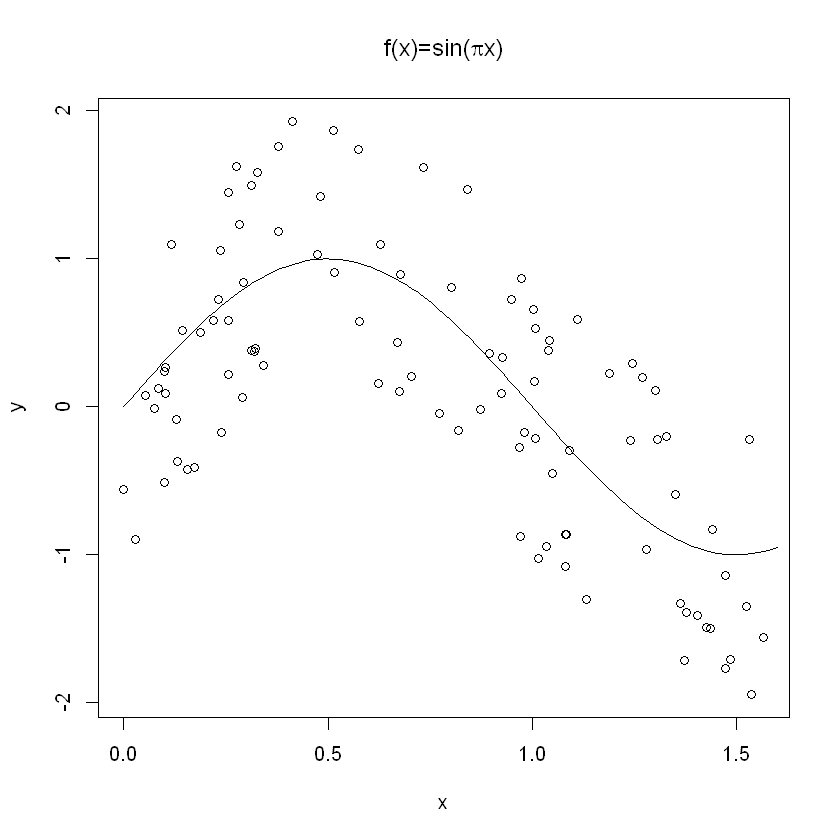

In [143]:
plot(x, return_y, main=expression( paste('f(x)=sin(', pi, 'x)')), ylab='y')
curve(sin_function(x), from =0 , to =1.6, add=TRUE)

__5) Advantage vs Disadvantage__ of the nonparametric approach:

__Advantage__

1. Flexigility
2. Fewer distributional assumptions

__Disadvantage__
1. Less efficient when structure of the relationship is available.
2. Interpretation difficulties 

3. We don't really have a formulaic way of describing the relationship between the predictors and the reponse.

### 2. Motivating Kernel Estimators

In [234]:
setwd('C:/Users/shims/Desktop/Generalized Linear Models and Nonparametric Regression')

In [235]:
bone <- read.csv('bone.csv', head=TRUE)

In [236]:
y=bone$spnbmd
x=bone$age

In [237]:
library(ggplot2)

__1) Simple Linear model__

`geom_smooth()` using formula 'y ~ x'



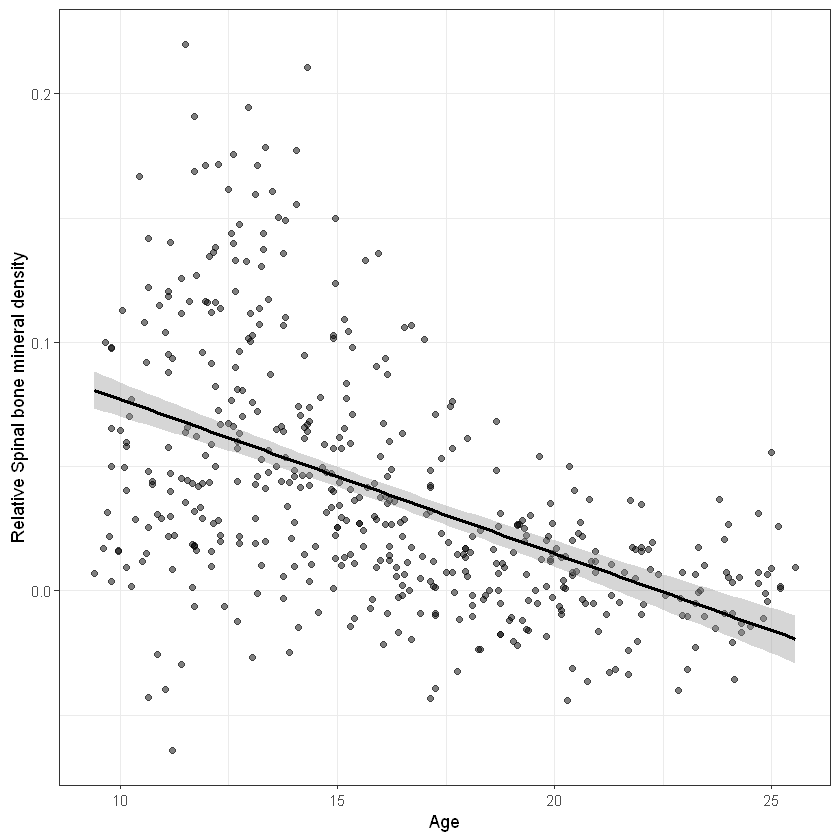

In [202]:
ggplot(bone, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = "lm", col = "black") +
    theme_bw() + # background color 
    labs(x = "Age", y='Relative Spinal bone mineral density') 

The plot between Age and Bone density does not appear a linear realationship. A better way to diagnose non-linearity would be to look at the residuals vs fitted values of this linear regression model. We see that there is an evidence of non-constant variance. Also, we see that there is some non-liner structure in the following plot.

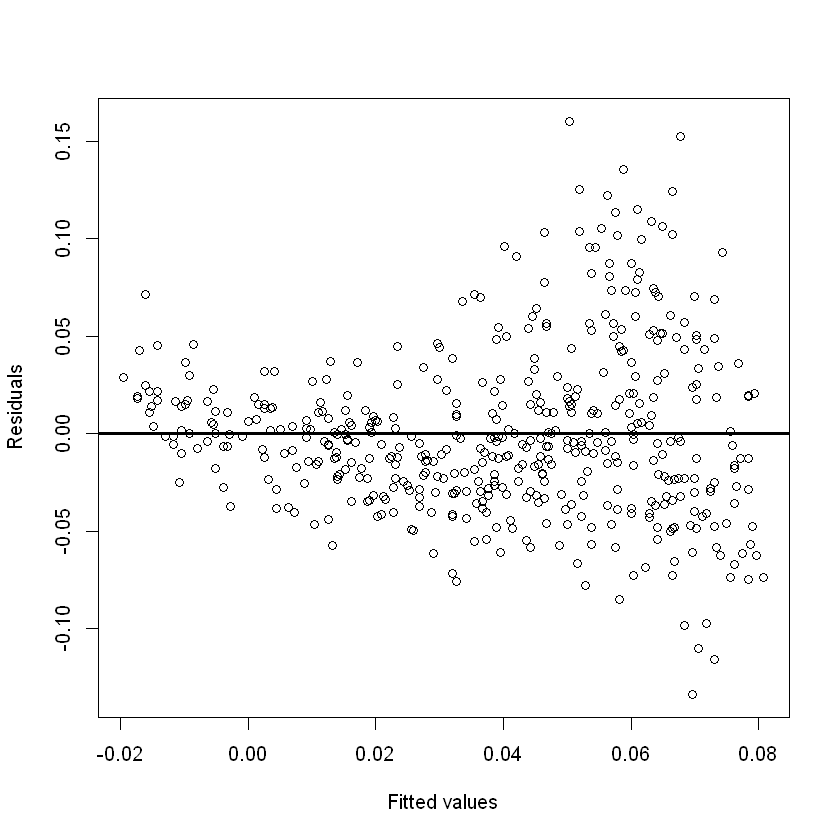

In [225]:
model1 <- lm(y~x)
res<-summary(model1)$residuals
fitted<-predict(model1)
plot(fitted, res, xlab='Fitted values', ylab="Residuals")
abline(h=0,lwd=3)

__2) Polynomial model__

We could try something like adding polynomial terms to the model. 
$ Y_i = \underbrace{\beta_0+\beta_1x_i+\beta_2x^2_i+\cdots+\beta_dx^d_i}_\text{f($x_i$)} + \epsilon_i$

Where d is the degree of the polynomial that we would like to fit.
* d=1 : simple linear regression model
* d=2 : adding in the square term
* d=3 : cubic term

Note that if you start with d=5, you need to contain $x, x^2, x^3, x^4, x^5$ in your model.

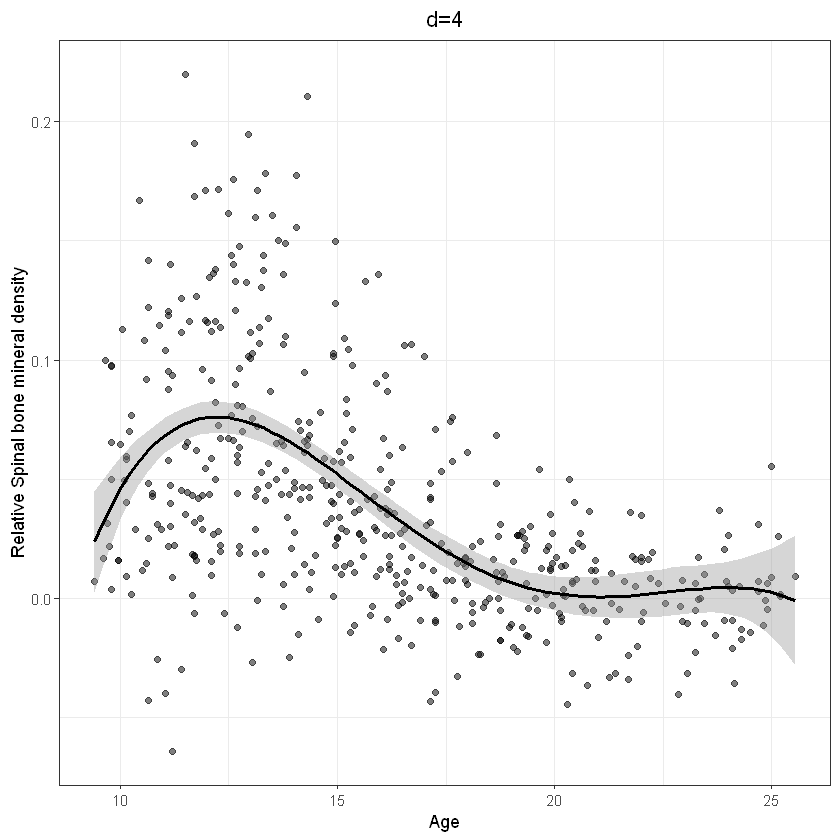

In [228]:
ggplot(bone, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = "lm", col = "black", formula=y ~ poly(x, 4, raw=TRUE)) +
    theme_bw() + # background color 
    labs(x = "Age", y='Relative Spinal bone mineral density') +
    ggtitle("d=4") +
    theme(plot.title = element_text(hjust = 0.5))

Let see the plot of residuals vs fitted value. It sill show some sings of misfit. Suppose we have several predictors. How would we think about eliminating different terms when we have many possible predictors.? An automated way to decide on the form of x is Kernel smoothing as one non -parametric method.

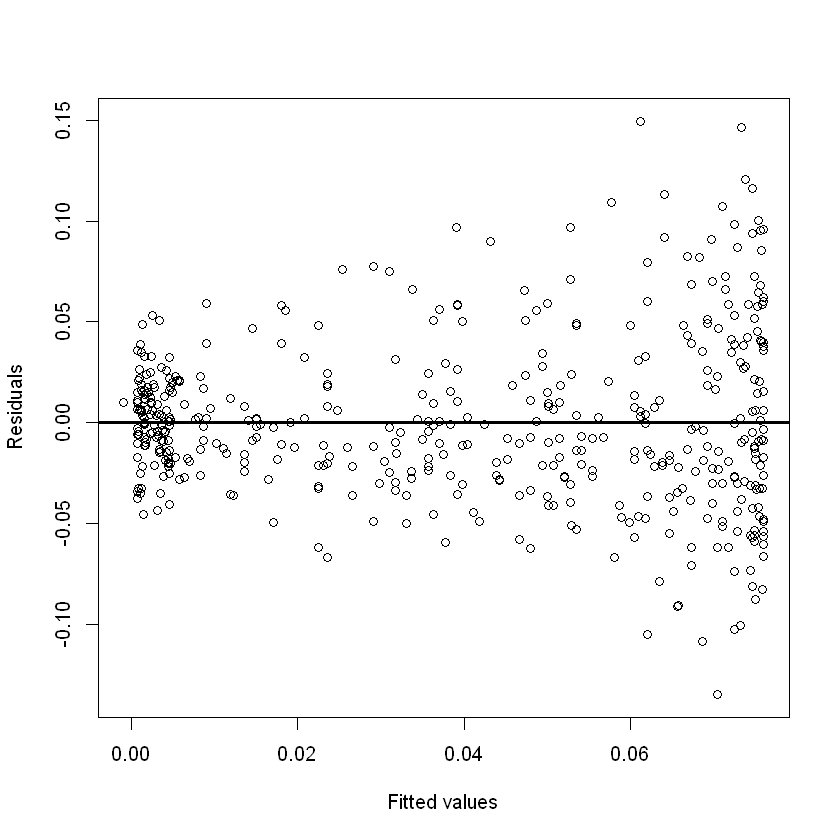

In [230]:
model2 <- lm(y~poly(x,4))
res2<-summary(model2)$residuals
fitted2<-predict(model2)
plot(fitted2, res2, xlab='Fitted values', ylab="Residuals")
abline(h=0,lwd=3)

__3) Kernel estimator__

This looks similar to the degree 4 polynomial, but we did not make a choice about what the degree of the polymonial is. But we have to make some choice in the Kernel estimator and will discuss later.

In [238]:
z <- ksmooth(x=bone$age, y=bone$spnbmd, kernel="normal", bandwidth=1)

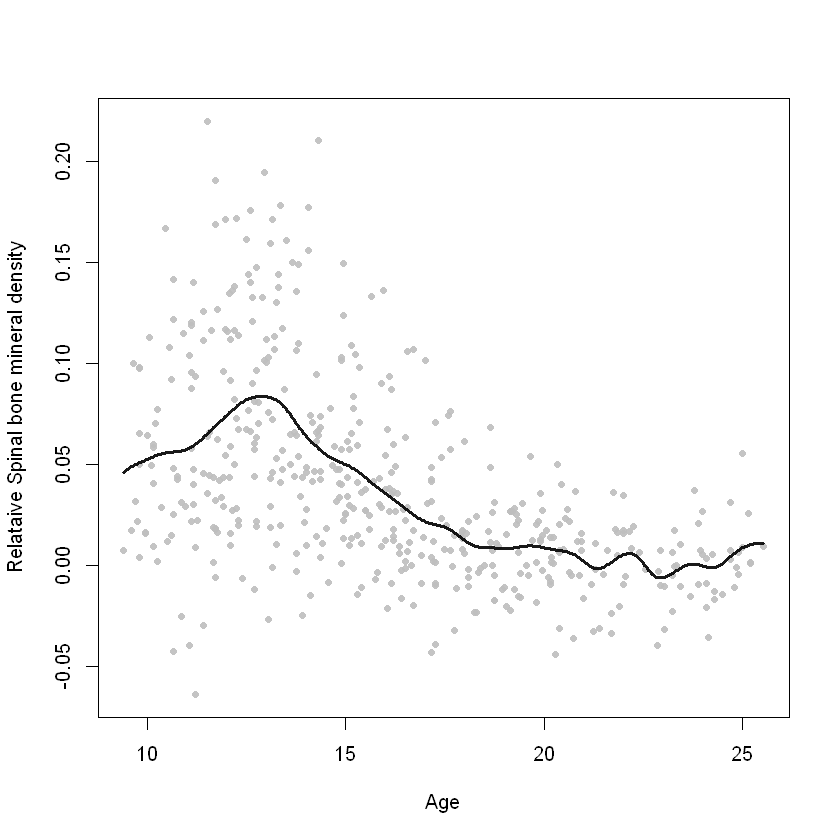

In [239]:
plot(spnbmd ~ age, data=bone, pch=16, cex=0.8, col = alpha("gray", 0.9), xlab="Age", ylab="Relataive Spinal bone mineral density")
lines(z, lwd=3, col = alpha("black", 0.9))

### 3. Kernel Estimators

__1) Definition__

A kernel estimator can be understood as a simple weighted local moving average of the reponse. $f$ is not specified and it is to be estimated from the data.

Model: $Y_i = f(x_i)+\epsilon_i$, $\epsilon_i \sim N(0, \sigma^2)$

## $\hat {f}_\lambda (x) = \frac{\frac{1}{n\lambda}\sum_{i=1}^n K(\frac{x-x_i}{\lambda})Y_i}{\frac{1}{n\lambda}\sum_{i=1}^n K(\frac{x-x_i}{\lambda})}$



* K is a function of $\frac{x-x_i}{\lambda}$. 
* The $\lambda$ and $K(\cdot)$ is basically the weight. 
If we define $w_i=\frac{1}{\lambda}K(\frac{x-x_i}{\lambda})$ ,  
the function would be 
$\hat {f}_\lambda (x) = \frac{\frac{1}{n} \sum_{i=1}^n w_i Y_i}
                             {\frac{1}{n}\sum_{i=1}^n w_i}$

__Definition__ : A _kernel_ is a nonnegative, real-valued function $K$ such that $K(x)=K(-x)$ for all values of $x$(symmetry) and $\int K(x) dx = 1$ (normalization). 

__Note__: Non-negarivitiy and nomralization are defining features of Probability density funcions(PDFs), so we can use PDFs a kernels, ex. normal pdf as kernel.

__2. Commnly used kernels__

1. Uniform/ rectangular:  $K(x)=\frac{1}{2}, \;\; -1 \leq x \leq 1$
2. Gaussian/Normal: $K(x) = \frac{1}{\sqrt{2\pi}}exp\{\frac{-x^2}{2}\}$
3. EpanechnikovL $K(x) = \frac{3}{4}(1-x)^2,  \;\; -1 \leq x \leq 1 $

__3. Kernel Estimators__

The _bandwidth_ or _smoothing parameter_ ($\lambda$) __controls__ the smoothness or bumpiness of the estimate, $\hat {f}$. In general, smaller $\lambda$ values will give bumpier fits and larger $\lambda$ values will give smoother fits.

In [240]:
z1 <- ksmooth(x=bone$age, y=bone$spnbmd, kernel="normal", bandwidth=0.1)
z2 <- ksmooth(x=bone$age, y=bone$spnbmd, kernel="normal", bandwidth=2)
z3 <- ksmooth(x=bone$age, y=bone$spnbmd, kernel="normal", bandwidth=10)

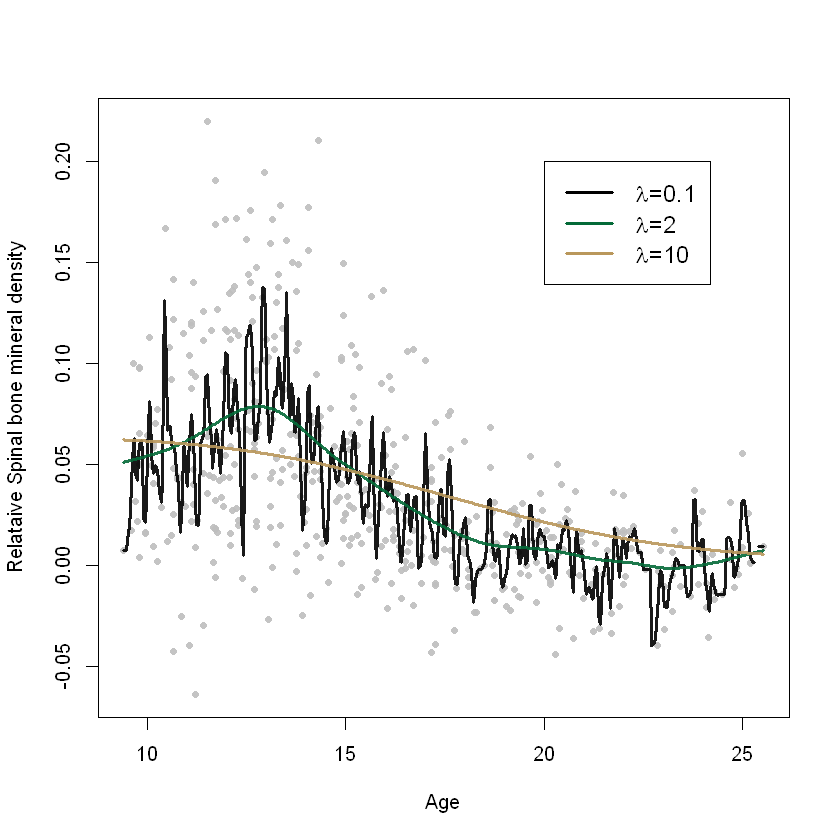

In [275]:
plot(spnbmd ~ age, data=bone, pch=16, cex=0.8, col = alpha("gray", 0.9), xlab="Age", ylab="Relataive Spinal bone mineral density")
lines(z1, lwd=3, col = alpha("black", 0.9))
lines(z2, lwd=3, col = alpha("#046A38", 0.9))
lines(z3, lwd=3, col = alpha("#B9975B", 0.9))


legend(x=20, y=0.2, lwd=3, lty=c(1,1,1), legend=c( expression(paste(lambda, "=0.1")),  
                               expression(paste(lambda, "=2")),
                            expression(paste(lambda, "=10"))),
                     col=c('black', '#046A38', '#B9975B'), cex=1.2)

We see that when $\lambda$ =0.1, the curve is sensitive in the fit. 